In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap
import seaborn as sns
from sklearn.decomposition import PCA

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))


In [3]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_z_cl= df_shape_z.drop(columns=['filename', 'label'])

In [4]:
df_shape_z_cl

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length
0,-0.961415,-0.894772,1.258475,-0.843346,0.135962,0.447795,-0.597306,-1.185373
1,-0.360419,0.546777,1.265948,-1.740919,-1.705151,-1.271934,0.510064,-0.369311
2,-1.007075,-1.161657,0.280864,1.120647,1.269197,1.018866,-1.051417,-1.039241
3,-0.791399,-0.944172,0.602786,1.184475,0.913221,-0.441900,-0.690335,-0.847833
4,-1.449934,-1.612899,-0.817832,1.002834,1.210664,0.876506,-1.792010,-1.527979
...,...,...,...,...,...,...,...,...
532,0.677867,1.059505,-0.758095,-0.543333,-0.607485,-0.690380,0.538420,1.134106
533,1.092142,0.926063,-1.279988,0.358045,0.055104,-1.057077,0.529269,1.361404
534,0.792944,0.682934,0.155389,-0.292736,-0.289068,-0.225443,0.734055,0.798670
535,0.594344,1.013475,-0.407132,-1.763399,-1.467330,1.445790,0.819826,1.257650


In [5]:
correlation_matrix = df_shape_z_cl.corr()

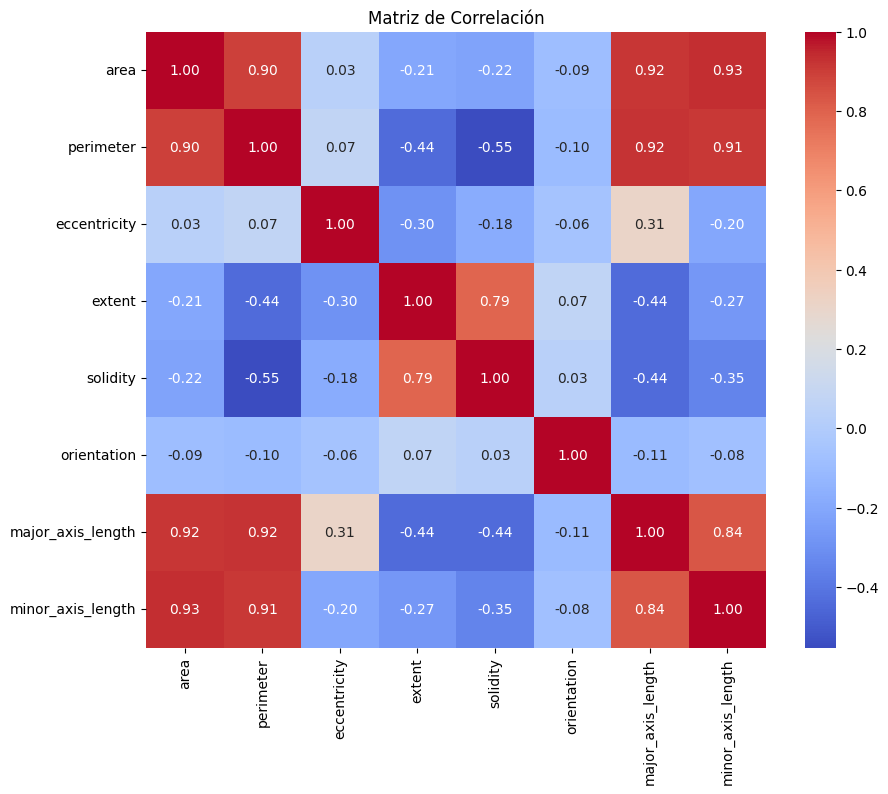

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

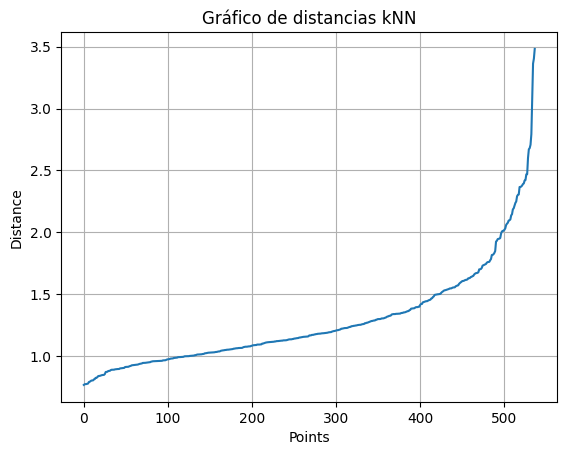

In [7]:
k = 9 #15
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_shape_z_cl)
distances, indices = neighbors_fit.kneighbors(df_shape_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [8]:
X_shape_z = np.array(df_shape_z_cl)

clustering = DBSCAN(eps=1, min_samples=9).fit(X_shape_z)

clustering.labels_

array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,
        0,  0,  0, -1, -1,  0,  0,  1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  1,  0,  1, -1,  0,
        0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1,  1, -1,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,
        0, -1,  0, -1,  0,  0,  0,  1, -1, -1,  0,  0,  0,  0, -1,  0,  1,
        0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  1,  0,  0, -1,
        0, -1,  0,  0, -1, -1,  1, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0, -1,
        0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0,  1,
       -1,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,
       -1, -1, -1, -1,  1

In [9]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 255


In [10]:
y_true = df_shape_z['label'] 
y_pred = clustering.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN   -1    0   1   2
Etiqueta Real                   
higher_than     141   16  95  16
smaller_than    114  140  15   0


In [11]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_shape_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")


Silhouette Score (sin ruido): 0.249


no se consiguen clusteres bien separados, todos los puntos se concentran en el 1 y hay mucho ruido

In [12]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model = umap.UMAP(n_neighbors= 9, n_components=2,min_dist=0.01, random_state=42)  #15
X_umap = umap_model.fit_transform(X_shape_z)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_19960\2725202540.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


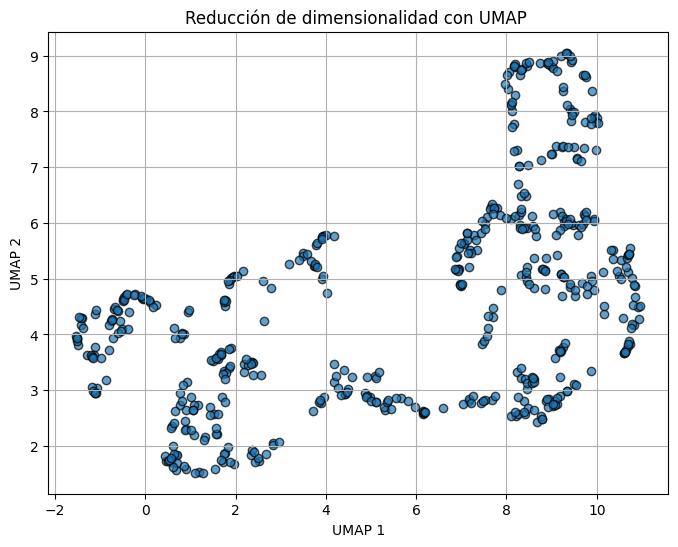

In [13]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [14]:
clustering_umap_z = DBSCAN(eps=1.1, min_samples=10, metric= 'manhattan').fit(X_umap)
clustering_umap_z.labels_

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [16]:
y_true = df_shape_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher_than      15  253
smaller_than    187   82


In [17]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.595


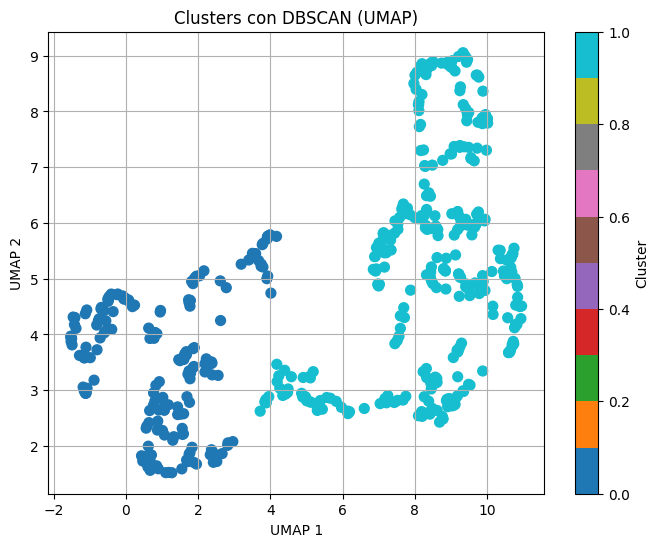

In [18]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

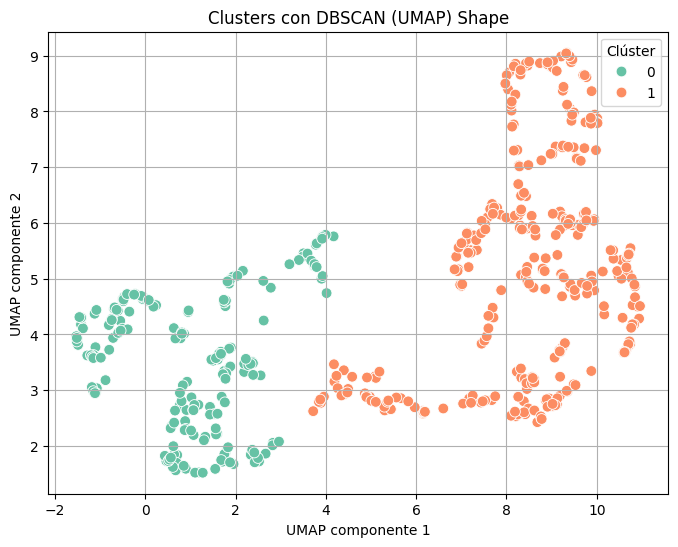

In [19]:
df_plot = pd.DataFrame({
    'UMAP 1': X_umap[:, 0],
    'UMAP 2': X_umap[:, 1],
    'Cluster': labels.astype(str) 
})

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='UMAP 1',
    y='UMAP 2',
    hue='Cluster',
    palette='Set2',
    s=60,
    edgecolor='white',
    alpha=1,
    legend='full'
)

plt.title("Clusters con DBSCAN (UMAP) Shape")
plt.xlabel("UMAP componente 1")
plt.ylabel("UMAP componente 2")
plt.grid(True)
plt.legend(title='Clúster')
plt.show()

mimax

In [20]:
df_shape_mm_cl= df_shape_mm.drop(columns=['filename', 'label'])

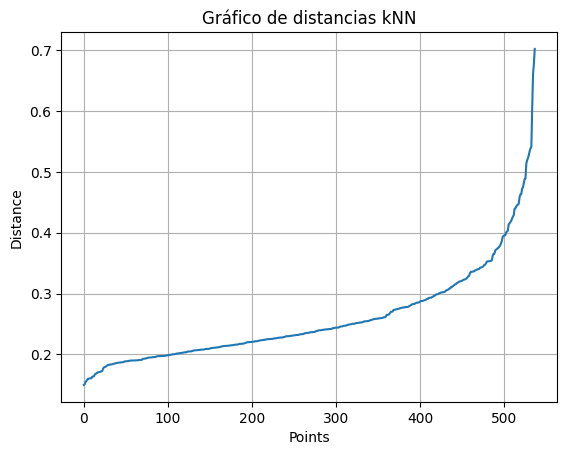

In [21]:
k = 9 #15
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_shape_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_shape_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [22]:
X_shape_mm = np.array(df_shape_mm_cl)

clustering = DBSCAN(eps=0.2, min_samples=9).fit(X_shape_mm)

clustering.labels_

array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,
        0,  0,  0, -1,  0,  0, -1,  1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  1,  0,  1, -1,  0,
        0,  0, -1,  1,  0,  0, -1,  0, -1,  0,  0, -1, -1,  1, -1,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,
        0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  1,
        0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1,
        0, -1,  0,  0,  0, -1,  1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,
        0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0, -1,
        0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0,  1,
       -1,  0,  0,  0,  1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,
       -1, -1, -1, -1, -1

In [23]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 270


In [24]:
y_true = df_shape_mm['label'] 
y_pred = clustering.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN   -1    0   1   2
Etiqueta Real                   
higher_than     155   14  84  15
smaller_than    115  138  16   0


In [25]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_shape_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.282


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_19960\2431628372.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


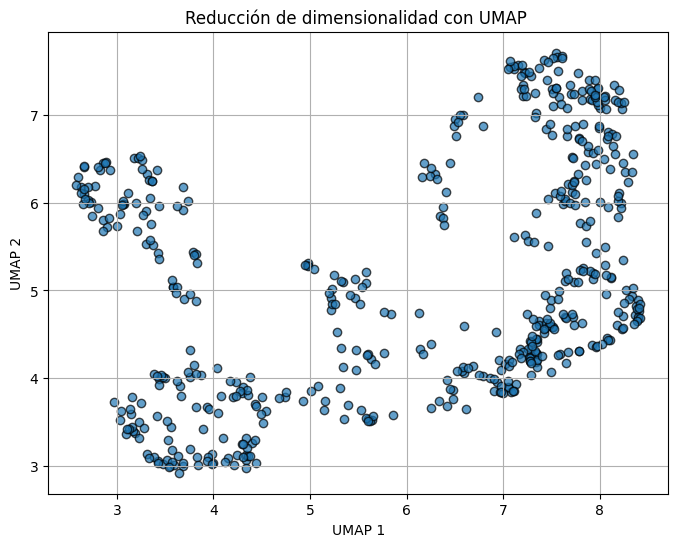

In [26]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 15, n_components=6,min_dist=0.01, random_state=42)  #15 #6
X_umap_mm = umap_model_mm.fit_transform(X_shape_mm)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [27]:
clustering_umap_mm = DBSCAN(eps=0.75, min_samples=11).fit(X_umap_mm)
clustering_umap_mm.labels_

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 0


In [29]:
y_true = df_shape_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1   2
Etiqueta Real               
higher_than       7  256   5
smaller_than    169   72  28


In [30]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.312


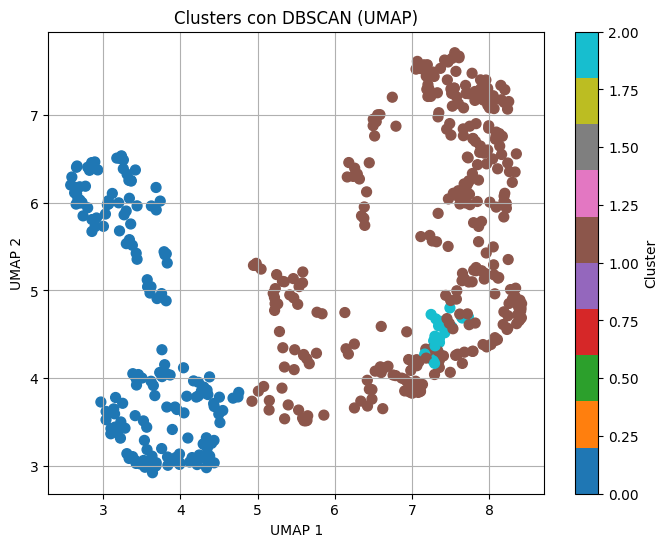

In [31]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

Con la reducción de la dimensionalidad de los datos min-máx y ajustando los diferentes hiperparámetros no consigo encontrar dos clusteres donde en uno de ellos haya más imágenes small y en otro más imágenes higher, pero con tres clusteres si he conseguido que en el cluster 1 haya 256 imágenes higher (qu son casi todas) y en el cluster 0 una buena parte de las imágenes small.